In [1]:
from omegaconf import OmegaConf
from hydra.utils import instantiate
import sys
import os
from matplotlib import pyplot as plt
import numpy as np
import hydra
os.chdir('/home/jingyan/Documents/sign_language_rgb')
sys.path.append('src')

hydra.initialize_config_dir('/home/jingyan/Documents/sign_language_rgb/configs')
cfg = hydra.compose('run/train/vitpose_trans_lightning')
    

/tmp/ipykernel_1123388/1419889823.py:11: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  hydra.initialize_config_dir('/home/jingyan/Documents/sign_language_rgb/configs')
/home/jingyan/anaconda3/envs/dl/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'run/train/vitpose_trans_lightning': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [2]:
dm = instantiate(cfg.datamodule)
dataset = dm.train_dataloader().dataset


/home/jingyan/anaconda3/envs/dl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


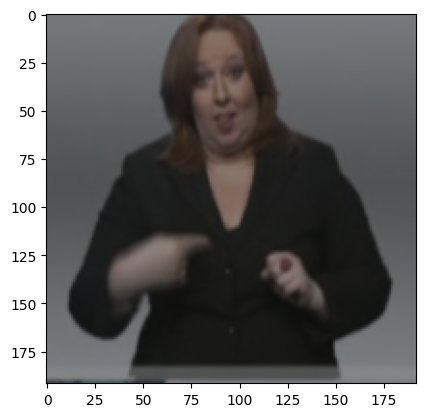

In [25]:

frame = dataset[2]['video'].numpy()
frame  = frame.transpose(0, 2, 3, 1)
plt.imshow(frame[30])

tensor(0.)


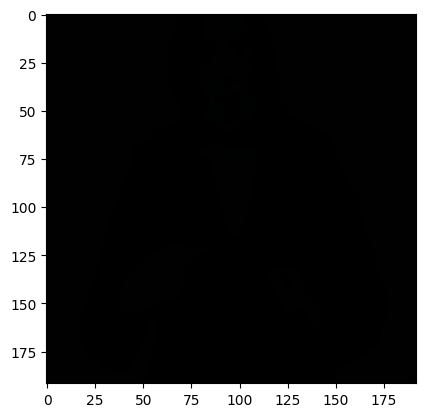

In [22]:
import torchvision.transforms as t
import PIL.Image as Image
import torch

img = Image.open('resources/0.jpg')
img = t.ToTensor()(img)
img = img/255.
img = t.ColorJitter(0.4, 0.4, 0.4, 0.1)(img)
print(img.min())
img = img.numpy().transpose(1, 2, 0) * 255
plt.imshow(img)